# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

<a id='pose_questions'></a>
## Posing Questions

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**:
- What are the most popular bike sharing systems?
- What are the least busy stations?
- What is the availability of bikes at a particular bike sharing station?
- What are the minimum and maximum time allowed to rent bikes?
- What is the gender ratio at a particular station on a given day?


<a id='wrangling'></a>
## Data Collection and Wrangling

**Question 2**: It's a good idea to start off by looking at one entry from each of the cities we're going to analyze.

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))

    with open(filename, 'r') as f_in:
        # Use the csv library to set up a DictReader object.
        trip_reader = csv.DictReader(f_in)

        # read the first trip from the data file and store it in first_trip.
        first_trip = trip_reader.__next__()

        # pprint library to print the first trip.
        pprint(first_trip)

    # return a tuple containing city name and first trip
    return (city, first_trip)


# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv', ]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip



City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

<a id='condensing'></a>
### Condensing the Trip Data

**Question 3a**: Complete the helper functions in the code cells below to make all three CSV data files homogeneous.

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    """
    # if city is Washington then convert duration from millis to minutes
    if city == 'Washington':
        duration = int(datum['Duration (ms)'])
        return duration/(60 * 1000)
    # else for Chicago and NYC convert duration from seconds to minutes
    else:
        duration = int(datum['tripduration'])
        return duration/60

# There should be no output if all of the assertions pass. The 
# `example_trips` dictionary was obtained from when you printed
# the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.    
    """
    # if NYC use the format month/date/year hour:minute:sec
    if city == 'NYC':
        date = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M:%S")
    # if Chicago use the format month/date/year hour:minute
    elif city == 'Chicago':
        date = datetime.strptime(datum['starttime'], "%m/%d/%Y %H:%M")
    # if Washington use the format month/date/year hour:minute
    else:
        date = datetime.strptime(datum['Start date'], "%m/%d/%Y %H:%M")
    
    # return tuple contating month, hour, day of week
    return (date.month, date.hour, str(date.strftime("%A")))


# There should be no output if all of the assertions pass.
# The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the user type that made the trip.
    """
    # if city is Washington
    if city == 'Washington':
        # use 'Member Type' for Washington data to get user type
        user_type = datum['Member Type']
        
        # if user type is 'Registered' return 'Subscriber' else 'Customer'
        if user_type == 'Registered':
            return 'Subscriber'
        else:
            return 'Customer'
    # for NYC and Chicago return user type as is from datam
    else:
        return datum['usertype']


# There should be no output if all of the assertions pass. 
# The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields duration, month, hour, day of week, user type.

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes the full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    """
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']
        trip_writer = csv.DictWriter(f_out, fieldnames=out_colnames)
        trip_writer.writeheader()

        # set up csv DictReader object
        trip_reader = csv.DictReader(f_in)

        # process each row in trip_reader
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            # use helper function duration_in_mins to get duration in minutes
            new_point['duration'] = duration_in_mins(row, city)
            
            # use helper function time_of_trip to get the month, hour, and day of week
            new_point['month'], new_point['hour'], new_point['day_of_week'] = time_of_trip(row, city)
            
            # use helper function time_of_trip to get the user type
            new_point['user_type'] = type_of_user(row, city)

            # write the processed information to the output file.
            trip_writer.writerow(new_point)

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

<a id='statistics'></a>
### Statistics

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
- **NYC** has the highest number of trips.<br>
- **NYC** has the highest proportion of trips made by Subscribers.<br>
- **Chicago** has the highest proportion of trips made by short-term Customers.

In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

file_paths = ['./data/Chicago-2016-Summary.csv',
              './data/NYC-2016-Summary.csv', './data/Washington-2016-Summary.csv']

for file_path in file_paths:
    n_subscribers, n_customers, n_total = number_of_trips(file_path)
    print(file_path)
    print("Number of Subscriber trips are {} and the proportion to total rides is {}".format(n_subscribers, n_subscribers/n_total))
    print("Number of Customer trips are {} and the proportion to total rides is {}".format(n_customers, n_customers/n_total))
    print("Total rides made are {}.\n".format(n_total))

./data/Chicago-2016-Summary.csv
Number of Subscriber trips are 54982 and the proportion to total rides is 0.7622520136973008
Number of Customer trips are 17149 and the proportion to total rides is 0.23774798630269925
Total rides made are 72131.

./data/NYC-2016-Summary.csv
Number of Subscriber trips are 245896 and the proportion to total rides is 0.8883590199351151
Number of Customer trips are 30902 and the proportion to total rides is 0.11164098006488486
Total rides made are 276798.

./data/Washington-2016-Summary.csv
Number of Subscriber trips are 51753 and the proportion to total rides is 0.7802822422579381
Number of Customer trips are 14573 and the proportion to total rides is 0.21971775774206193
Total rides made are 66326.



**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**:
- **Chicago**<br>
Average trip length: 16.56 minutes<br>
Proportion of number trip duration(greater than 30): 0.0833 or 8.33%<br>

- **NYC**<br>
Average trip length: 15.81 minutes<br>
Proportion of number trip duration(greater than 30): 0.073 or 7.3%<br>

- **Washington**<br>
Average trip length: 18.93 minutes<br>
Proportion of number trip duration(greater than 30): 0.1083 or 10.83%

In [10]:
def average_of_trip_duration(filename):
    """
    This function reads in a file with trip data and reports the average of
    total trip duration and proportion of the number of trip duration(greater 
    than 30) to the total number of trips made.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        # initialize count variables
        sum_duration = 0
        n_members = 0
        n_trips_greater_than_30 = 0

        # process all the rows of reader object
        for row in reader:
            # convert string duration to float
            duration = float(row['duration'])

            # count number of trip duration greater than 30
            if duration > 30:
                n_trips_greater_than_30 += 1

            # sum of total duration
            sum_duration += duration

            # total number of trips made
            n_members += 1

        # return average and proportion as a tuple
        return (sum_duration/n_members, n_trips_greater_than_30/n_members)

In [11]:
for file_path in file_paths:
    average, proportion = average_of_trip_duration(file_path)
    print(file_path)
    print("Average trip length: {} minutes".format(average))
    print("Proportion of number trip duration(greater than 30): {}\n".format(proportion))

./data/Chicago-2016-Summary.csv
Average trip length: 16.563629368787335 minutes
Proportion of number trip duration(greater than 30): 0.08332062497400562

./data/NYC-2016-Summary.csv
Average trip length: 15.81259299802294 minutes
Proportion of number trip duration(greater than 30): 0.07302437156337835

./data/Washington-2016-Summary.csv
Average trip length: 18.93287355913721 minutes
Proportion of number trip duration(greater than 30): 0.10838886711093688



**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 
- **NYC**<br>
Average Subscriber Trip Duration: 13.680790523907177 minutes<br>
Average Customer Trip Duration: 32.77595139473187 minutes<br>

Clearly, Customers takes longer rides on average than Subscribers in NYC.

In [12]:
def trip_duration(filename):
    """
    This function reads in a file with trip data and reports the average of
    trip duration made by Subscribers and Customers.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        sum_subscribers_duration = 0
        sum_customers_duration = 0

        # tally up ride types and sum the duration of subscribers and customers
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
                sum_subscribers_duration += float(row['duration'])
            else:
                n_customers += 1
                sum_customers_duration += float(row['duration'])

        # return averages as a tuple
        return (sum_subscribers_duration/n_subscribers, sum_customers_duration/n_customers)

In [13]:
average, proportion = trip_duration('./data/NYC-2016-Summary.csv')
print('./data/NYC-2016-Summary.csv')
print("Average Subscriber Trip Duration: {} minutes".format(average))
print("Average Customer Trip Duration: {} minutes\n".format(proportion))

./data/NYC-2016-Summary.csv
Average Subscriber Trip Duration: 13.680790523907177 minutes
Average Customer Trip Duration: 32.77595139473187 minutes



<a id='visualizations'></a>
### Visualizations

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: 
- **NYC**
- **Subscribers**<br>
The peak is at **5-10**. The shape of this graph is **positively skewed**.<br>

- **Customers**<br>
The peak is at **20-25**. The shape of this graph is **positively skewed**.<br>

In [14]:
def plot_time_duration(filename, user_type):
    """
    This function reads in a file with trip data and user type and
    plots a histogram of the trip of duration made by the user type.
    """
    # extract city name from filename
    city = filename.split('-')[0].split('/')[-1]
    
    # load library
    import matplotlib.pyplot as plt

    # this line shows plots inline
    %matplotlib inline 

    with open(filename, 'r') as f_in:
        # set up csv reader
        trip_reader = csv.DictReader(f_in)

        # set an empty list for data
        data = list()
        
        # append all trip duration made by the user type in data list
        for row in trip_reader:
            if row['user_type'] == user_type:
                data.append(float(row['duration']))

    # use red color line for Customers and blue color line for Subscribers
    if user_type == 'Customer':
        color = 'r'
    else:
        color = 'b'
    
    # set the properties of histogram and plot it
    plt.hist(data, bins=15, range=(0, 75), color=color)
    plt.title("Trip of duration for {}'s {}".format(city, user_type))
    plt.xlabel('Duration (m)')
    plt.ylabel('Frequency')
    plt.show()

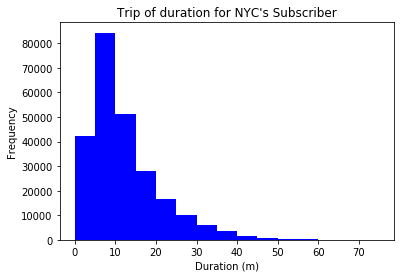

In [15]:
# Run this cell to plot histogram for Subscribers of NYC
plot_time_duration('./data/NYC-2016-Summary.csv', 'Subscriber')

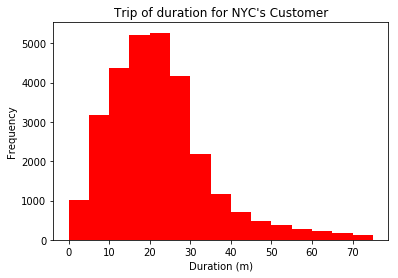

In [16]:
# Run this cell to plot histogram for Customers of NYC
plot_time_duration('./data/NYC-2016-Summary.csv', 'Customer')

<a id='eda_continued'></a>
## Performing Your Own Analysis

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Posed Question: **During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?<br>
**Answer**:
- **Chicago**:<br>
The system is used the most at 5 PM(17:00 hr) by Subscribers and 2 PM(14:00 hr) by Customers.

- **NYC**:<br>
The system is used the most at 5 PM(17:00 hr) by Subscribers and 3 PM(15:00 hr) by Customers.

- **Washington**:<br>
The system is used the most at 5 PM(17:00 hr) by Subscribers and 2 PM(14:00 hr) by Customers.

Yes, there are **two differences** in usage pattern of subscribers and customers:
1. There are **two peaks of usage system (one at morning and other at evening) for subscribers** and on the other hand, there is **a peak in the usage of system (in evening) for customers**.
2. The bike share system is **used more frequently by subscribers than by customers**.

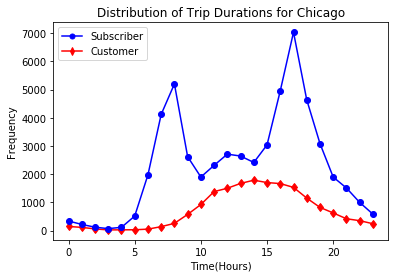

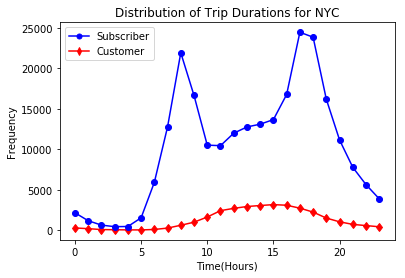

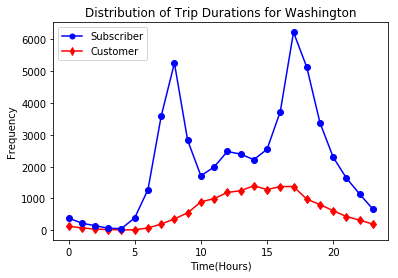

In [17]:
def plot_time_of_day(filename):
    """
    This function reads in a file with trip data and plots a line 
    graph of each hour of day frequencies of the trip was made for 
    Subscribers and Customers.
    """
    # extract city name from filename
    city = filename.split('-')[0].split('/')[-1]
    
    # load library
    import matplotlib.pyplot as plt

    # this line shows plots inline
    %matplotlib inline

    with open(filename, 'r') as f_in:
        # set up csv reader
        trip_reader = csv.DictReader(f_in)

        # set and empty list for subscriber and customer
        subscriber_data = list()
        customer_data = list()

        # initialize frequency of hours of day to zero for Subscribers and Customers
        for i in range(24):
            subscriber_data.append(0)
            customer_data.append(0)

        # tally up the trip made per hour
        for row in trip_reader:
            # convert got hour string to int
            hour = int(row['hour'])
            
            # tally up the frequency of rides made per hour according to subscriber and customer 
            if row['user_type'] == 'Subscriber':
                subscriber_data[hour] = subscriber_data[hour] + 1
            else:
                customer_data[hour] = customer_data[hour] + 1

    # set legend properties for Subscriber
    blue_circle = plt.Line2D([], [], color='blue', marker='o',
                                  markersize=5, label='Subscriber')
    
    # set legend properties for Customer
    red_diamond = plt.Line2D([], [], color='red', marker='d',
                                  markersize=5, label='Customer')
    
    #plot graph with red line and diamond markers for Customer
    plt.plot(range(24), customer_data, color = 'r', marker = 'd')
    
    #plot graph with blue line and circle markers for Subscriber
    plt.plot(range(24), subscriber_data, color = 'b', marker = 'o')
    
    # set other properties of plot and show
    plt.title('Distribution of Trip Durations for ' + city)
    plt.xlabel('Time(Hours)')
    plt.ylabel('Frequency')
    plt.legend(handles=[blue_circle, red_diamond])
    plt.show()

for file_path in file_paths:
    plot_time_of_day(file_path)

<a id='conclusions'></a>
## Conclusions

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: I would choose Bitcoin which is based on Blockchain technology as my field of interest. I would like to use [Bitcoin Data](https://blockchain.info/charts/market-price) to apply data science techniques to learn about the time of year in which Bitcoin prices are affected and to predict the future prices of bitcoin to a certain extent.

## Convert Jupyter notebook to HTML

In [18]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0